# Исследование объектов общественного питания в Москве

## Анализ задачи, понятийный апарат

### Постановка задачи

В рамках поставленной задачи нам предоставили возможность изучить данные об объектах общественного питания, расположенных в городе Москве.

**Целью исследования** является формирования видения успешного заведения общественного питания.

**Основными задачами** являются:

- Изучить имеющиеся данные, провести анализ и возможную очистку данных.

- Исследовать распределение объектов общественного питания на сетевые и не сетевые;
- Изучить различия между объектами общественного питания в разрезе типа заведения;
- Изучить наиболее популярные улицы для создания заведения, а также наименее популярные улицы города Москвы;

### Содержание базы данных

Для упрощения работы с данными ознакомимся с переменными и данными, которые будут изучаться в этой работе.

База данных состоит из следующих столбцов: 
- `id` — идентификатор объекта;
- `object_name` — название объекта общественного питания;
- `chain` — сетевой ресторан;
- `object_type` — тип объекта общественного питания;
- `address` — адрес;
- `number` — количество посадочных мест.


### Анализ входной информации

Предварительно отметим следующее по базам данных:

- `object_name` – необходимо проанализировать данные на дубликаты и предусмотреть возможные варианты решения этой проблемы. 
- `object_type` – после знакомства с типами значений лучше всего определить конкретно, что из себя представляет тип заведения.
- `address` – нужно предусмотреть способы изъятия инофрмации из данного столбца.

## Знакомство с данными

### Знакомство с данными

Импортируем необходимые библиотеки и выгрузим данные из csv.

In [1]:
#Библиотека pandas
import pandas as pd

#Библиотеки с визуализацией и отображением 
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt

#Матан, статистика
import numpy as np
from scipy import stats as st
import math as mth


In [2]:
rest_data = pd.read_csv('/datasets/rest_data.csv')

Изучим содержание датафрейма.

In [3]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [4]:
display(rest_data)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [5]:
rest_data.loc[:,'object_name'] = rest_data.loc[:,'object_name'].str.lower()

rest_data.loc[:,'object_name'] = rest_data.loc[:,'object_name'].str.replace('«|»|"|\'', '')

Посмотрим на содержание колонок.

In [6]:
print(rest_data['chain'].value_counts())
print(f'Всего значений в колонке chain - {rest_data["chain"].value_counts().sum()}')

нет    12398
да      2968
Name: chain, dtype: int64
Всего значений в колонке chain - 15366


In [7]:
print(rest_data['object_type'].value_counts())
print(f'Всего значений в колонке object_type - {rest_data["object_type"].value_counts().sum()}')

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64
Всего значений в колонке object_type - 15366


Столбцы `chain` и `object_type` есть данные категориального типа, преобразуем их в тип `category`.

In [8]:
rest_data.loc[:,'chain'] = rest_data.loc[:,'chain'].astype('category')
rest_data.loc[:,'object_type'] = rest_data.loc[:,'object_type'].astype('category')

Другие типы данных соответствуют содержанию. Можно было бы преобразовать тип данных для `id` и `number` в неотрицательные целочисленные данные для уменьшения используемой памяти, но общий объем данных не так велик.

In [9]:
rest_data['number'].describe()

count    15366.000000
mean        59.547182
std         74.736833
min          0.000000
25%         12.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

1700 посадочных мест - максимальное значение. При этом минимум - 0 посадочных мест. Изучим, что это за заведения.

In [10]:
display(rest_data[rest_data['number'] == 0])

,id,object_name,chain,object_type,address,number
137,115498,пекарня & донер,нет,закусочная,"город Москва, Бутырская улица, дом 9, корпус 2",0
154,152556,шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0
157,149568,суши,нет,предприятие быстрого обслуживания,"город Москва, улица Маршала Василевского, дом ...",0
190,126956,"шаурма, куры-гриль",нет,предприятие быстрого обслуживания,"город Москва, 1-я Владимирская улица, дом 21",0
195,149531,"шаурма, куры-гриль",нет,предприятие быстрого обслуживания,"город Москва, 2-я Владимирская улица, дом 44/10",0
...,...,...,...,...,...,...
15334,211228,милти,да,магазин (отдел кулинарии),"город Москва, Дубравная улица, дом 34/29",0
15335,211221,милти,да,магазин (отдел кулинарии),"город Москва, Пятницкое шоссе, дом 3",0
15336,211209,готовые блюда милти,да,предприятие быстрого обслуживания,"город Москва, Ореховый бульвар, дом 22А",0
15337,208477,милти,да,предприятие быстрого обслуживания,"город Москва, 3-й Крутицкий переулок, дом 18",0


Наименование заведений подсказывает, что мы имеем дело с заведениями, работающими исключительно на вынос. Ошибки нет.

Но метод `describe` указал и на другое значение, максимальное. 1700 мест - такое представить очень трудно. Посмотрим на 95 и 99 перцентили.

In [11]:
rest_data['number'].quantile(q=[.9,.95,0.99])

print((rest_data['number'].quantile(0.99)))

300.0


In [12]:
display(rest_data.query('number > number.quantile(.99)'))

,id,object_name,chain,object_type,address,number
15,23663,школа 1011,нет,столовая,"город Москва, улица Авиаторов, дом 18",320
105,24616,сказка востока,нет,ресторан,"город Москва, Коктебельская улица, дом 11, стр...",420
120,26075,макдоналдс,да,предприятие быстрого обслуживания,"город Москва, Большая Бронная улица, дом 29",580
1080,27295,муган,нет,ресторан,"город Москва, Соловьиный проезд, дом 6",350
1611,838,темпл бар,да,кафе,"город Москва, Первомайская улица, дом 33",356
...,...,...,...,...,...,...
13195,204172,столовая - кантинасити,нет,буфет,"город Москва, Садовническая улица, дом 82, стр...",320
13299,200905,white hall,нет,ресторан,"город Москва, Ферганская улица, дом 8",700
13378,155741,пилзнер,да,ресторан,"город Москва, 1-я Тверская-Ямская улица, дом 7",320
14155,207566,столовая мит,нет,столовая,"город Москва, Берёзовая аллея, дом 10, корпус 1",600


[array([12.,  0.]), array([ 80., 181.])]

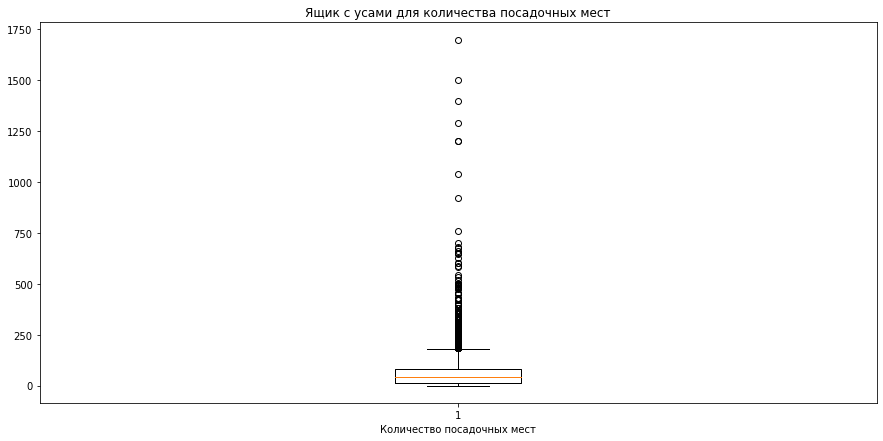

In [13]:
plt.figure(figsize=(15,7))
plt.title("Ящик с усами для количества посадочных мест")
example = plt.boxplot(rest_data['number'])
plt.xlabel('Количество посадочных мест')

#смотрю на границы усов
[item.get_ydata() for item in example['whiskers']]


На графике видим, что на после уровня 750 значений по переменным становится совсем мало, тем не менее, их значения будут мешать статистическим расчетам. В связи с этим, признаем значения по количеству посадочных мест свыше 750 аномальными.

In [14]:
print('Доля удаляемых значений - {:.4%}'.format(len(rest_data.query('number > 750')['number'])/len(rest_data['number'])))

Доля удаляемых значений - 0.0586%


Всего будет удалено 0,06% от общего числа строк, что не помешает исследованию других переменных базы данных.

In [15]:
rest_data = rest_data.query('number <= 750')

Теперь изучим подробнее, есть ли в `rest_data` дубликаты и пропуски.

In [16]:
for x in rest_data.columns:
    print(f'Количество дубликатов в столбце {x} - {rest_data[x].duplicated().sum()}')

Количество дубликатов в столбце id - 0
Количество дубликатов в столбце object_name - 5528
Количество дубликатов в столбце chain - 15355
Количество дубликатов в столбце object_type - 15348
Количество дубликатов в столбце address - 6254
Количество дубликатов в столбце number - 15050


Среди дубликатов нас интересует только столшбец `address`. По нему у нас 6258 повторяющихся адресов. Посмотрим на количество дубликатов без столбца `id`

In [17]:
display(rest_data[['object_name','chain', 'object_type', 'address', 'number']].duplicated().sum())

85

85 полностью повторяющихся значения, не считая `id`. Исключим их.

In [18]:
drop_indexes = (
    rest_data[['object_name','chain', 'object_type', 'address', 'number']]
    .duplicated()
    .loc[lambda x : x == True]
    .index
)

rest_data = rest_data.drop(index=drop_indexes)

In [19]:
display(rest_data)

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе академия,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе вишневая метель,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


Посмотрим на пропуски:

In [20]:
for x in rest_data.columns:
    print(f'Количество пропусков в столбце {x} - {rest_data[x].isnull().sum()}')

Количество пропусков в столбце id - 0
Количество пропусков в столбце object_name - 0
Количество пропусков в столбце chain - 0
Количество пропусков в столбце object_type - 0
Количество пропусков в столбце address - 0
Количество пропусков в столбце number - 0


Пропусков нет, отлично.

### Вывод

В рамках данного этапа работы мы ознакомились с содержимым датафрейма `dest_data`. Мы сделали следующее:

- Избавились от дубликатов.
- Проработали наименования объектов.
- Преобразовали типы данных в корректные
- Проверили значения на null.

Теперь можно приступать непосредственно к анализу данных.

## Анализ данных.

### Анализ

Для начала исследуем соотношение видов объектов общественного питания по количеству. 

<Figure size 432x288 with 0 Axes>

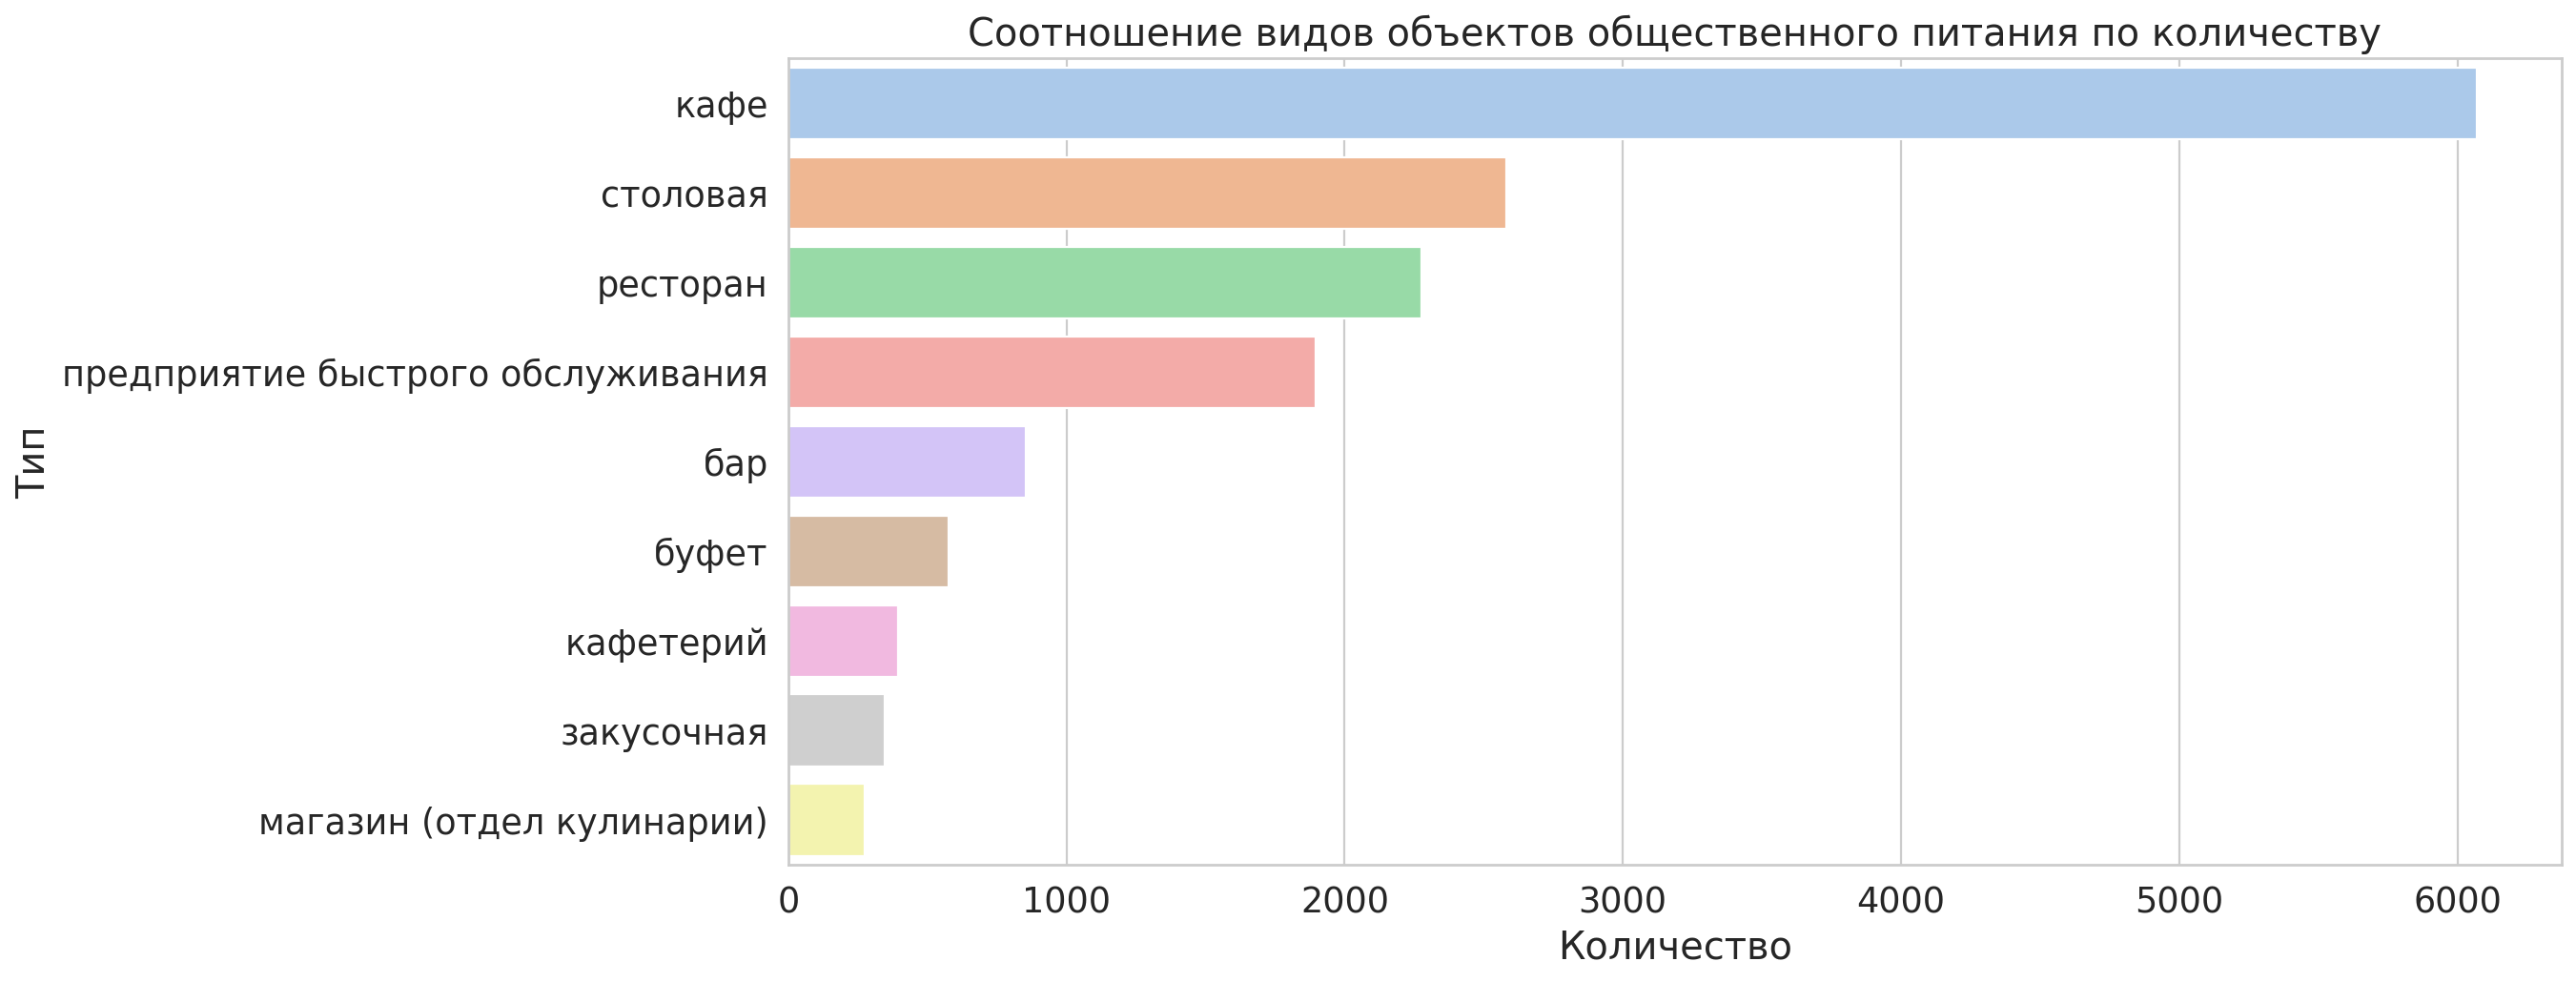

In [21]:
#получим датафрейм с данными по количеству различных объектов общественного питания
count_obj = rest_data.groupby('object_type').agg({'object_name':'count'}).sort_values(by='object_name',ascending=False).reset_index()
count_obj = count_obj.rename(columns={'object_name': 'total_count'})

#Зададим стиль для отображения seaborn
sns.set_palette('pastel') 
sns.set_style("whitegrid") 
sns.despine(left=True) 
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})



plt.figure(figsize=(15, 7), dpi=160)
plt.title('Соотношение видов объектов общественного питания по количеству')
sns.barplot(y='object_type', x='total_count', data=count_obj, order=count_obj['object_type'])
plt.xlabel('Количество')
plt.ylabel('Тип')
plt.show()
plt.close()

На изображенном графике видим, что больше всего в Москве объектов общественного питания типов "кафе", "столова" "ресторан" и "предприятие быстрого обслуживания". 

Других типов заведений в разы меньше.



Теперь исследуем соотношение сетевых и несетевых заведений по количеству.

In [22]:
chain_type = rest_data.groupby(['object_type', 'chain']).agg({'number':'count'}).reset_index()

Методом `groupby` получили общее распределение по типу объекта обещственного питания и приндалежности к сети.

In [23]:
display(chain_type)

,object_type,chain,number
0,бар,да,37
1,бар,нет,817
2,буфет,да,11
3,буфет,нет,565
4,закусочная,да,56
5,закусочная,нет,292
6,кафе,да,1396
7,кафе,нет,4675
8,кафетерий,да,52
9,кафетерий,нет,343


Теперь уточним данные и построим график.

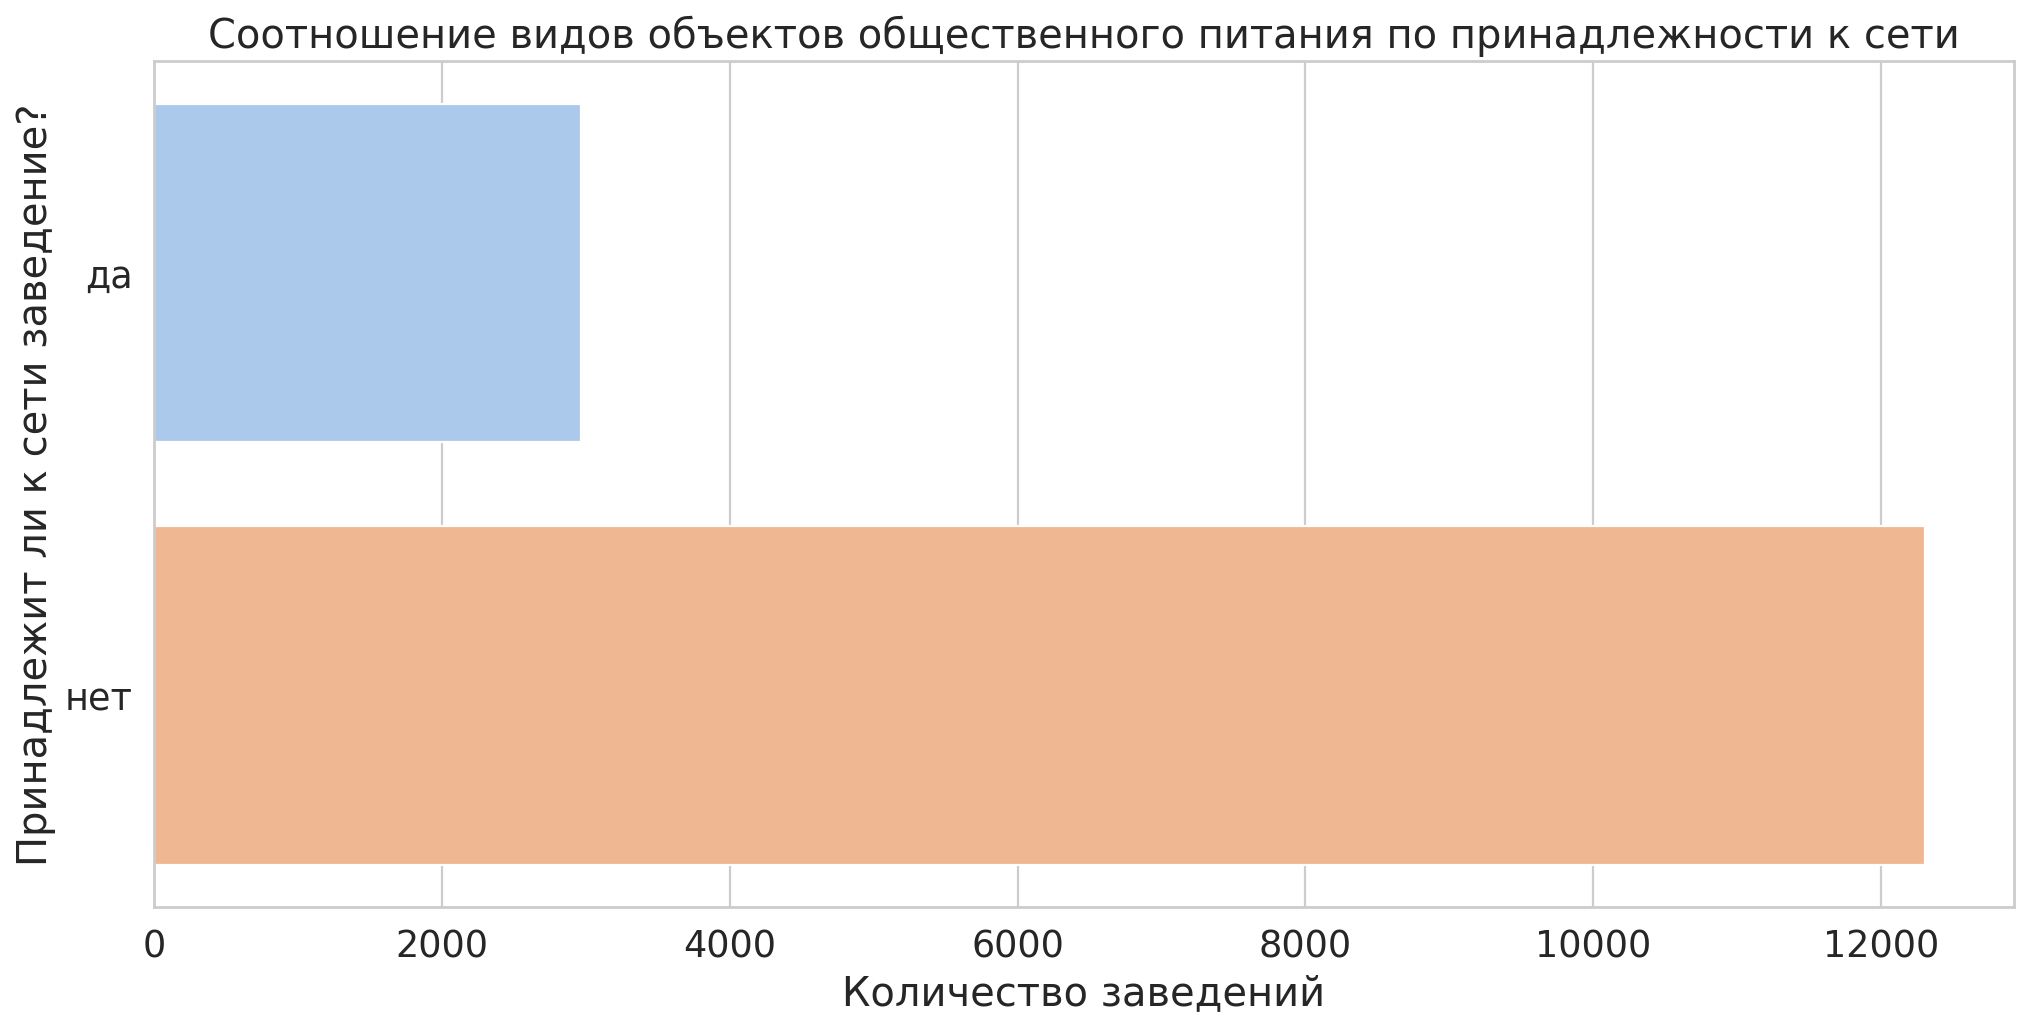

In [24]:
chain_group = chain_type.groupby('chain')['number'].sum().reset_index()


plt.figure(figsize=(15, 7), dpi=160)
plt.title('Соотношение видов объектов общественного питания по принадлежности к сети')
sns.barplot(y='chain', x='number', data=chain_group)
plt.xlabel('Количество заведений')
plt.ylabel('Принадлежит ли к сети заведение?')
plt.show()
plt.close()

Большинство заведений не являются сетевыми. Необходимо понять, какой тип заведений предпочитает быть сетевым.

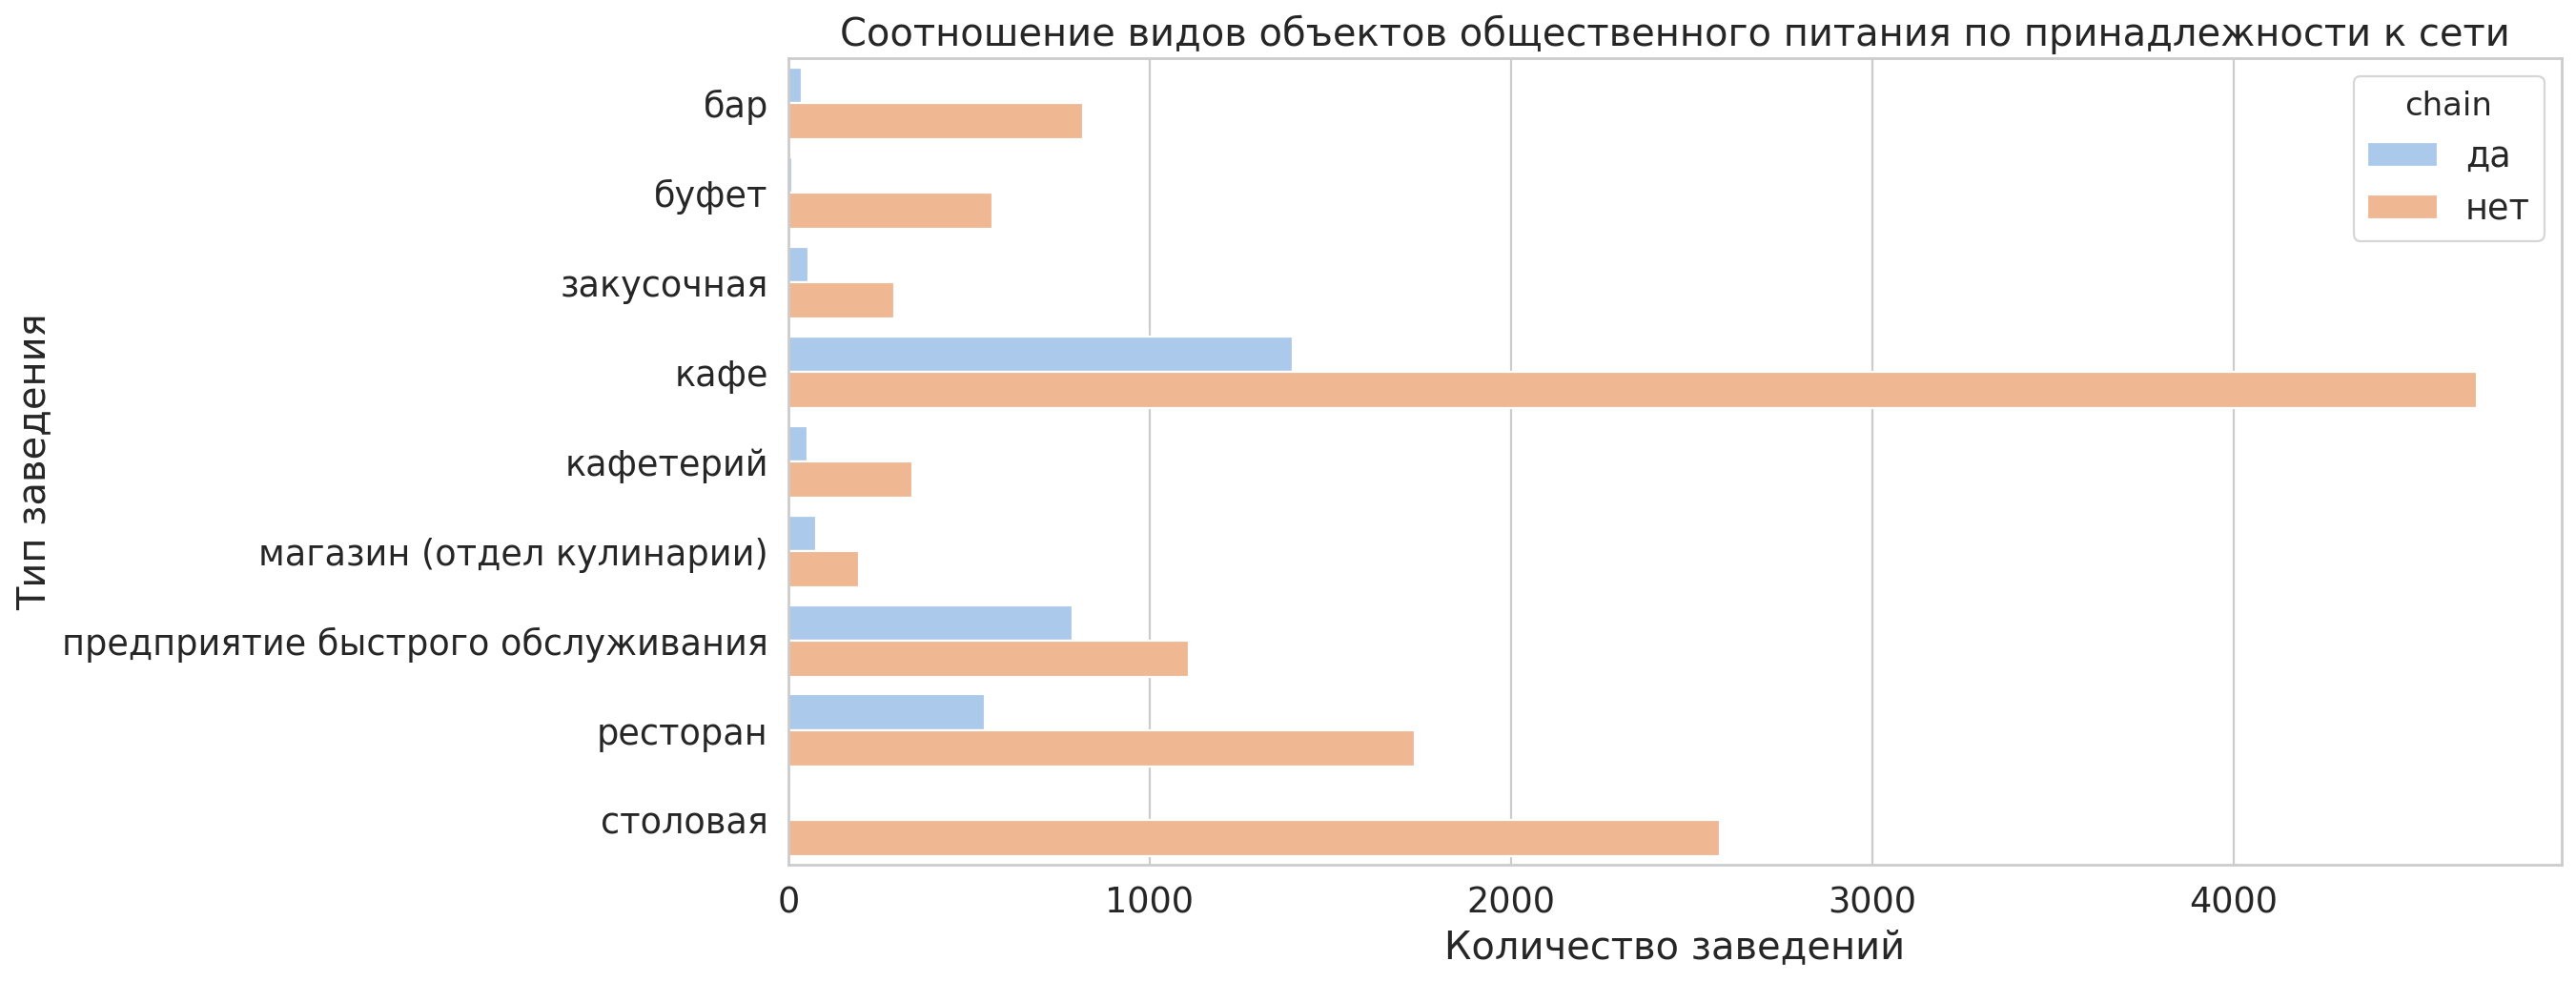

In [25]:
plt.figure(figsize=(15, 7), dpi=160)
plt.title('Соотношение видов объектов общественного питания по принадлежности к сети')

sns.barplot(y='object_type', x='number', data=chain_type, hue='chain')
plt.xlabel('Количество заведений')
plt.ylabel('Тип заведения')
plt.show()
plt.close()

Из таблицы видим, что большиество предприятий быстрого обслуживания организуются по сетевому признаку. При этом на первом месте по количеству таких заведений расположена категория "кафе". Но в относительных величинах соотношение несетевых кафе к сетевым меньше, чм для предприятий быстрого обслуживания.

Также отметим, что рестораны тоже бывают сетевыми.

А вот среди столовых нет сетевых. Возможно, это вызвано тем, что столовые открываются при каких-либо образовательных структурах, заводах и тому подобное.

Изучим подробнее сетевые подразделения.

In [26]:
chain_rest = rest_data.query('chain == "да"')

In [27]:
display(chain_rest)

,id,object_name,chain,object_type,address,number
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
6,148815,брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
13,22579,алло пицца,да,кафе,"город Москва, улица Авиаторов, дом 14",32
16,144107,суши wok,да,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7
18,58565,тануки,да,ресторан,"город Москва, Большая Академическая улица, дом 65",160
...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [28]:
report = chain_rest.groupby('object_name').agg({'object_type': 'count', 'number':'mean'})
report = report.sort_values(by='object_type', ascending=False) 
report = report.rename(columns={'object_type':'count', 'number':'places'})

In [29]:
display(report)

,count,places
object_name,,
шоколадница,157,57.184713
kfc,155,55.341935
макдоналдс,150,87.700000
бургер кинг,137,46.649635
теремок,94,25.606383
...,...,...
кафе прайм стар,1,50.000000
кафе поль бейкери,1,3.000000
кафе песто и митлес,1,80.000000


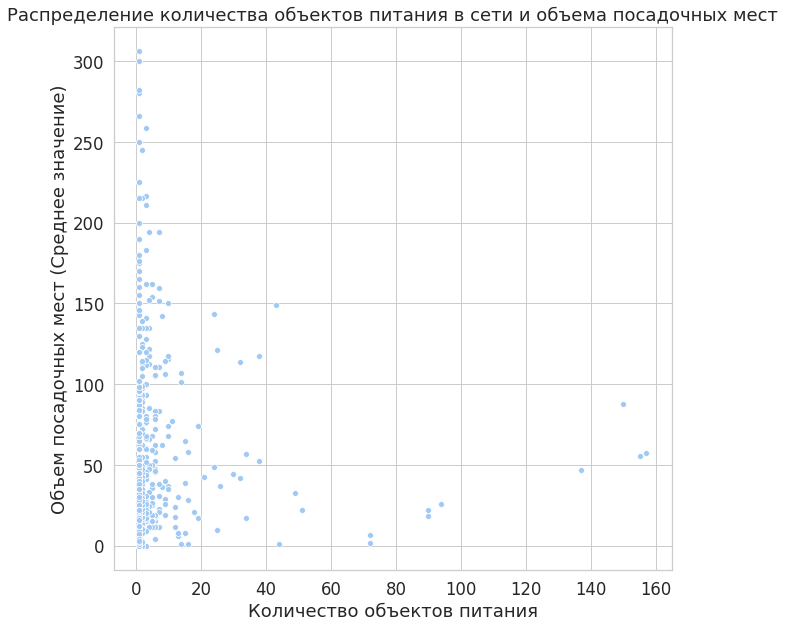

In [30]:
plt.figure(figsize=(10,10))
plt.title("Распределение количества объектов питания в сети и объема посадочных мест")
sns.scatterplot(x='count', y='places', data=report)
plt.xlabel('Количество объектов питания')
plt.ylabel('Объем посадочных мест (Среднее значение)')
plt.show()
plt.close()

Большинство сетей предпочитает иметь небольшое количество заведений с небольшим количеством посадочных мест.

На графике также отметим, что довольно большое количество сетевых заведений фактически имеют реализацию в виде одного объекта общественного питания. Это довольно странно, поэтому посмотрим на данные, где таких заведений нет.

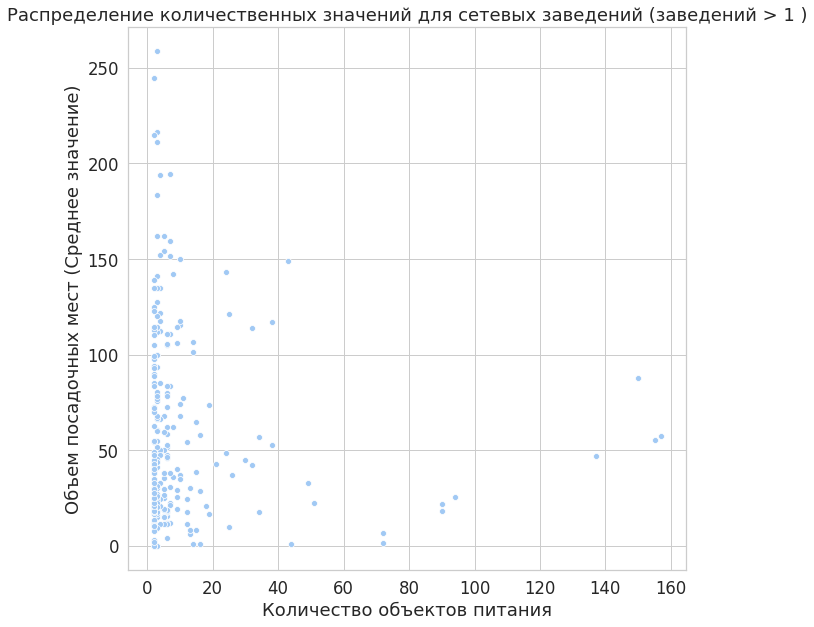

In [31]:
report_2 = report.query('count > 1')

plt.figure(figsize=(10,10))
plt.title("Распределение количественных значений для сетевых заведений (заведений > 1 )")
sns.scatterplot(x='count', y='places', data=report_2)
plt.xlabel('Количество объектов питания')
plt.ylabel('Объем посадочных мест (Среднее значение)')
plt.show()
plt.close()

Выводы остаются теми же, но график стал куда меньше. 

Продолжим изучение данных. Найдём среднее количество посадочных мест для каждого вида объекта общественного питания. 

Сначала посмотрим на распределение количества посадочных мест, чтобы определить, какая статистическая переменная точнее выражает выборку.

In [32]:
chain_rest['number'].describe()

count    2964.000000
mean       52.981107
std        57.152817
min         0.000000
25%        15.000000
50%        40.000000
75%        72.000000
max       580.000000
Name: number, dtype: float64

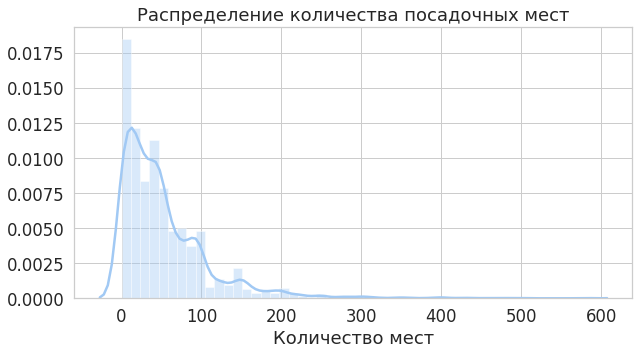

In [33]:
plt.figure(figsize=(10,5))
plt.title('Распределение количества посадочных мест')
sns.distplot(chain_rest['number'])
plt.xlabel('Количество мест')
plt.show()
plt.close()

Будем брать медиану.

In [34]:
display(rest_data)

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе академия,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе вишневая метель,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


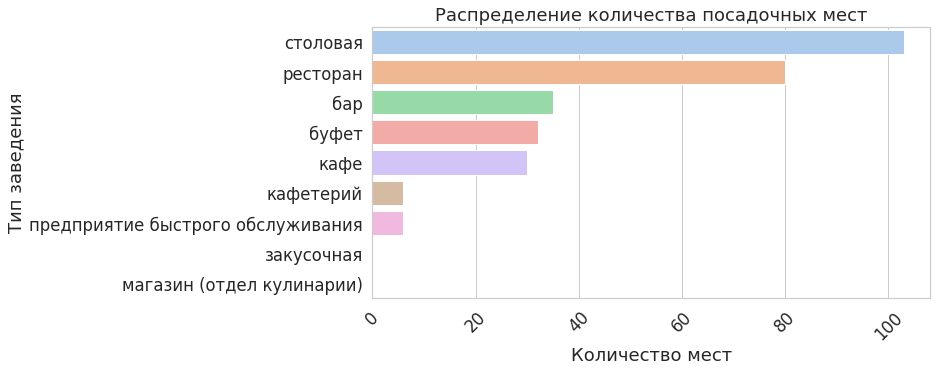

In [35]:
number_group = rest_data.groupby('object_type').agg({'number':'median'}).reset_index().sort_values('number', ascending=False)

plt.figure(figsize=(10,5))
plt.title('Распределение количества посадочных мест')
sns.barplot(y='object_type', x='number', data=number_group, order=number_group['object_type'])
plt.xlabel('Количество мест')
plt.ylabel('Тип заведения')
plt.xticks(rotation=45)
plt.show()
plt.close()

Здесь необходимо дать комментарий насчет того, что из себя представляют различные типы заведений. 

- `Столовая` – здесь имеется в виду заведение, предназначенное для питания школьников, работников фирмы и тому подобное. То есть предполагается, что оно вмещает в себя много человек в определенные часы (обеденные). Из-за этого оно на первом месте.
- `Ресторан` – для ресторана важно иметь посадочные места, ведь от максимального количества зависит максимальная прибыль, получаемая в горячте часы.
- `Бар` – для бара не так важно количество мест в связи с тем, что вид деятельности в баре предполагает распитие алкогольных напитков и общение не сидя, а стоя;
- `Буфет и кафе` – чаще всего это небольшие, но уютные заведения. Буфет строится при заведении (театр, завод и тому подобное), а кафе существует сама по себе;
- `Кафетерий` – совсем небольшое пространство, в котором производят кофе.
- `Предприятие быстрого обслуживания` предполагает большое количество заведений с относительно небольшим количеством посадочных мест для употребления пищи. 

Исходя из данных выше, получется, что наибольшее значение по местам у Столовых и ресторанов, а наименьшее - у закусочных и отделов кулинарии при магазинах

Теперь выделим информацию об улице из столбца "address'.

In [36]:
places = '(улица|шоссе|переулок|проезд|бульвар|проспект|аллея|набережная|площадь|линия|квартал|микрорайон|территория)'
part1 = '\, (([а-яА-Я0-9\-ёй\s"]+)?'
part2 = '([а-яА-Яёй0-9\-\s"]+)?)\,'

pattern = part1 + places + part2


rest_data['street'] = rest_data['address'].str.extract(pat = pattern)[0]
display(rest_data)

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе академия,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе вишневая метель,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,Киевское шоссе


Получили множество значений, теперь посмотрим на пропуски.

In [37]:
print(f'Количество пропусков - {rest_data["street"].isna().sum()}')

Количество пропусков - 378


In [38]:
display(rest_data.query('street.isna()')['address'].value_counts())

город Москва, поселение Московский, деревня Говорово, дом 1Б/Н                    7
город Москва, 87-й километр Московской Кольцевой Автодороги, дом 8                7
город Москва, поселение Московский, деревня Саларьево, владение 3, строение 1     5
город Москва, поселение Воскресенское, посёлок Воскресенское, дом 40, корпус 2    4
город Москва, город Зеленоград, корпус 317А, строение 1                           4
                                                                                 ..
город Москва, поселение Краснопахорское, село Красная Пахра, дом 6                1
город Москва, 19-й километр Московской Кольцевой Автодороги, владение 6А          1
город Москва, поселение Сосенское, посёлок Коммунарка, дом 20А                    1
улица Обручева, дом 23, строение 1                                                1
Киевская улица, дом 7                                                             1
Name: address, Length: 312, dtype: int64

312 уникальных адресов, всего 378 значений. Не так много. Большинство значений также представляют собой не улицы, а поселки, деревни и даже дороги.

In [39]:
rest_data = rest_data.query('~street.isna()')

Теперь построим график топ-10 улиц по количеству объектов общественного питания. 

In [40]:
popular_streets = (
    rest_data
    .groupby('street')
    .agg({'object_name':'count'})
    .reset_index()
    .sort_values('object_name', ascending=False)
)

In [41]:
display(popular_streets)
report = popular_streets.head(10)

,street,object_name
1413,проспект Мира,203
1008,Профсоюзная улица,181
683,Ленинградский проспект,170
993,Пресненская набережная,167
398,Варшавское шоссе,164
...,...,...
515,Егорьевский проезд,1
56,1-я Карачаровская улица,1
938,Парусный проезд,1
157,3-й Павловский переулок,1


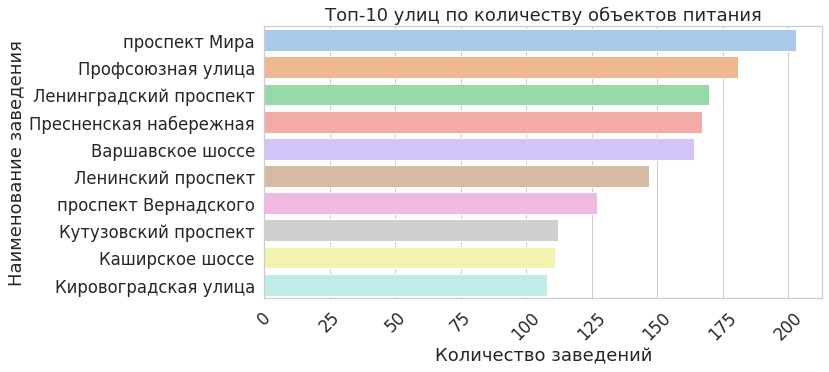

In [42]:
plt.figure(figsize=(10,5))
plt.title('Топ-10 улиц по количеству объектов питания')
sns.barplot(y='street', x='object_name', data=report, order=report['street'])
plt.xlabel('Количество заведений')
plt.ylabel('Наименование заведения')
plt.xticks(rotation=45)
plt.show()
plt.close()

Далее импортируем датафрейм с наименованием улиц и районов.

In [43]:
from io import BytesIO
import requests

spreadsheet_id = '1QZyVuvj6FW_BYvbvpBjuYPa_1xOFoVBo01A07Np8ZOY'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
street_district = pd.read_csv(BytesIO(r.content))
street_district = street_district[['street', 'area', 'okrug']]

display(street_district)

,street,area,okrug
0,Выставочный переулок,Пресненский район,ЦАО
1,улица Гашека,Пресненский район,ЦАО
2,Большая Никитская улица,Пресненский район,ЦАО
3,Глубокий переулок,Пресненский район,ЦАО
4,Большой Гнездниковский переулок,Пресненский район,ЦАО
...,...,...,...
4393,Вознесенский проезд,Пресненский район,ЦАО
4394,Волков переулок,Пресненский район,ЦАО
4395,Поварская улица,Пресненский район,ЦАО
4396,Кудринская площадь,Пресненский район,ЦАО


Посмотрим на дубликаты.

In [44]:
print(f'Всего полных дубликатов - {street_district.duplicated().sum()}')
street_district = street_district.drop_duplicates()

Всего полных дубликатов - 8


Проверяем дубликаты по улицам (учитывая размеры города Москвы, можно утверждать, что они точно есть)

In [45]:
print(f"Дубликатов по столбцу street - {street_district['street'].duplicated().sum()}")

Дубликатов по столбцу street - 786


К сожалению, в рамках поставленной задачи полностью исключить вариант наложения одного значения на другое будет очень сложно. Для этого нужна база данных по всем домам, находящимся на улицах, их номерам и принадлежностью к району. Поиск в интернете базы данных с такой информацией ничего толкового не дал. Поэтому придётся избавляться от дубликатов.

In [46]:
street_district = (
    street_district
    .groupby('street')
    .agg({'area':'first', 'okrug':'first'})
    .reset_index()
)

По наименованию улиц попробуем соединить два датафрейма.

In [47]:
rest_streets = rest_data.merge(street_district, on='street')

In [48]:
display(rest_streets)

,id,object_name,chain,object_type,address,number,street,area,okrug
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,Ярославский Район,СВАО
1,193477,grill-house,нет,закусочная,"город Москва, улица Егора Абакумова, дом 14А",0,улица Егора Абакумова,Ярославский Район,СВАО
2,196756,пекарня,нет,кафетерий,"город Москва, улица Егора Абакумова, дом 14А",12,улица Егора Абакумова,Ярославский Район,СВАО
3,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,Таганский район,ЦАО
4,83942,кафе даиси,нет,кафе,"город Москва, улица Талалихина, дом 31А/2",78,улица Талалихина,Таганский район,ЦАО
...,...,...,...,...,...,...,...,...,...
14430,206426,чайхана мантыбар,нет,ресторан,"город Москва, улица Кожевнический Вражек, дом 3А",30,улица Кожевнический Вражек,Даниловский район,ЮАО
14431,214324,кадаши ( закрытый),нет,ресторан,"город Москва, 2-й Кадашёвский переулок, дом 16...",15,2-й Кадашёвский переулок,Район Якиманка,ЦАО
14432,223171,кондитерская пряник.рогалик,нет,кафе,"город Москва, город Троицк, Пионерская улица, ...",20,Пионерская улица,Район Внуково,ЗАО
14433,213851,ресторан атмосфера,нет,ресторан,"город Москва, улица Василисы Кожиной, дом 1, к...",49,улица Василисы Кожиной,Район Филевский Парк,ЗАО


In [1]:
rest_streets

NameError: name 'rest_streets' is not defined

Проверим датафрейм на пропуски.

In [49]:
display(rest_streets.query('okrug.isna()'))

,id,object_name,chain,object_type,address,number,street,area,okrug


Пропусков нет, все хорошо. Теперь изучим данные по самым популярным улицам.

In [50]:
popular_streets = (
    rest_streets
    .groupby('street')
    .agg({'object_name':'count', 'okrug':'first', 'area':'first'})
    .reset_index()
    .sort_values('object_name', ascending=False)
)

In [51]:
popular_streets

,street,object_name,okrug,area
1357,проспект Мира,203,СВАО,Алексеевский район
972,Профсоюзная улица,181,ЮЗАО,Академический район
658,Ленинградский проспект,170,САО,Район Аэропорт
957,Пресненская набережная,167,ЦАО,Пресненский район
379,Варшавское шоссе,164,ЮАО,Район Чертаново Центральное
...,...,...,...,...
428,Гаражная улица,1,ВАО,Район Соколиная Гора
1229,Хованская улица,1,СВАО,Останкинский район
425,Газгольдерная улица,1,ЮВАО,Нижегородский район
1234,Хохловский переулок,1,ЦАО,Басманный район


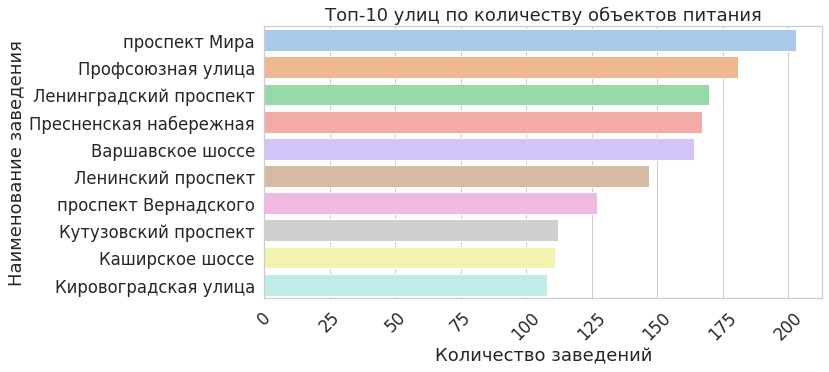

In [52]:
report=popular_streets.head(10)

plt.figure(figsize=(10,5))
plt.title('Топ-10 улиц по количеству объектов питания')
sns.barplot(y='street', x='object_name', data=report, order=report['street'])
plt.xlabel('Количество заведений')
plt.ylabel('Наименование заведения')
plt.xticks(rotation=45)
plt.show()
plt.close()

In [53]:
report

,street,object_name,okrug,area
1357,проспект Мира,203,СВАО,Алексеевский район
972,Профсоюзная улица,181,ЮЗАО,Академический район
658,Ленинградский проспект,170,САО,Район Аэропорт
957,Пресненская набережная,167,ЦАО,Пресненский район
379,Варшавское шоссе,164,ЮАО,Район Чертаново Центральное
661,Ленинский проспект,147,ЗАО,Район Проспект Вернадского
1355,проспект Вернадского,127,ЗАО,Район Проспект Вернадского
649,Кутузовский проспект,112,ЗАО,Район Дорогомилово
574,Каширское шоссе,111,ЮАО,Район Москворечье-Сабурово
581,Кировоградская улица,108,ЮАО,Район Чертаново Центральное


Возьмём другую выборку - топ-50 самых больших улиц. И посмотрим на их распределение по районам Москвы.

In [54]:
report = (
    popular_streets.head(50)
    .groupby('okrug')
    .agg({'street':'count', 'object_name':'sum'})
    .sort_values(by='street', ascending=False)
    .reset_index()
)


In [55]:
display(report)

,okrug,street,object_name
0,ЦАО,15,1126
1,ЮАО,9,812
2,ЗАО,7,599
3,ВАО,4,229
4,САО,4,435
5,СВАО,3,349
6,СЗАО,3,149
7,ЮВАО,2,118
8,ЮЗАО,2,255
9,Зеленоград,1,100


In [56]:
report = (
    popular_streets.head(50)
    .groupby('area')
    .agg({'object_name':'sum', 'okrug':'first'})
    .sort_values(by='object_name', ascending=False)
    .reset_index()
)

report

,area,object_name,okrug
0,Даниловский район,280,ЮАО
1,Район Проспект Вернадского,274,ЗАО
2,Район Чертаново Центральное,272,ЮАО
3,Тверской район,260,ЦАО
4,Басманный район,257,ЦАО
5,Алексеевский район,203,СВАО
6,Академический район,181,ЮЗАО
7,Район Аэропорт,170,САО
8,Район Арбат,169,ЦАО
9,Пресненский район,167,ЦАО


Топ 10 улиц не так информативен, но вот топ-50 даёт однозначные результаты. Наиболее популярные районы для "популярных улиц" - ЦАО, ЮАО, ЗАО и ВАО. В топ-10 улиц видим, что большинство из них - не улицы, а проспекты, набережные и вообще - длинные улицы. Этим также можно объяснить большое количество объектов питания на них.

Теперь найдём улицы с 1 объектов общественного питания.

In [57]:
one_market = popular_streets[popular_streets['object_name'] == 1]

display(one_market)

,street,object_name,okrug,area
3,1-й Басманный переулок,1,ЦАО,Басманный район
14,1-й Зачатьевский переулок,1,ЦАО,Район Хамовники
37,1-й Силикатный проезд,1,СЗАО,Район Хорошево-Мневники
202,7-й Ростовский переулок,1,ЦАО,Район Хамовники
4,1-й Ботанический проезд,1,СВАО,Район Свиблово
...,...,...,...,...
428,Гаражная улица,1,ВАО,Район Соколиная Гора
1229,Хованская улица,1,СВАО,Останкинский район
425,Газгольдерная улица,1,ЮВАО,Нижегородский район
1234,Хохловский переулок,1,ЦАО,Басманный район


In [58]:
report = (
    one_market
    .groupby('area')
    .agg({'object_name':'sum', 'okrug':'first'})
    .sort_values(by='object_name', ascending=True)
)

report.head(15)

,object_name,okrug
area,,
Район Марфино,1,СВАО
Район Очаково-Матвеевское,1,ЗАО
Район Восточный,1,ВАО
Район Метрогородок,1,ВАО
Район Гагаринский,1,ЮЗАО
Район Крюково,1,Зеленоград
Панфиловский район,1,Зеленоград
Район Северное Измайлово,1,ВАО
Район Марьино,1,ЮВАО


In [59]:
report = (
    one_market
    .groupby('okrug')
    .agg({'object_name':'sum'})
)

report

,object_name
okrug,
ВАО,59
ЗАО,45
Зеленоград,4
САО,47
СВАО,64
СЗАО,25
ЦАО,168
ЮАО,24
ЮВАО,50


Сделаем следующие выводы:

- Улицы с одним заведением - не редкое явление и для районов, расположенных недалеко от центра. Всё зависит, скорее всего, от протяженности улицы и от каких-то places of interest. Опять же, исследование показало, что и в Басманном районе достаточно таких улиц, хотя это уже близ центра.
- Наименее популярные районы, где создают рестораны - жилые районы на окраине города или далеко от центра. Это можно объяснить тем, что трафик в этих районах небольшой.



Теперь посмотрим на улицы, на которых расположено большое количество объектов общественного питания.

In [60]:
display(popular_streets['object_name'].describe())

count    1793.000000
mean        8.050753
std        16.029381
min         1.000000
25%         1.000000
50%         3.000000
75%         8.000000
max       203.000000
Name: object_name, dtype: float64

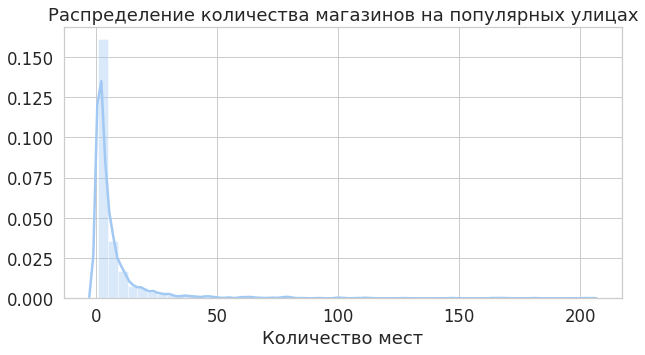

In [61]:
plt.figure(figsize=(10,5))
plt.title('Распределение количества магазинов на популярных улицах')
sns.distplot(popular_streets['object_name'])
plt.xlabel('Количество мест')
plt.show()
plt.close()

Определим улицы с большим количеством объектов общественного питания как те, в которых больше 30 таких мест.

In [62]:
popular_streets = popular_streets[popular_streets['object_name'] > 30]

streets_list = popular_streets['street'].to_list()

In [63]:
report = rest_data.query('street in @streets_list')

Отобразим на графике полученные данные.

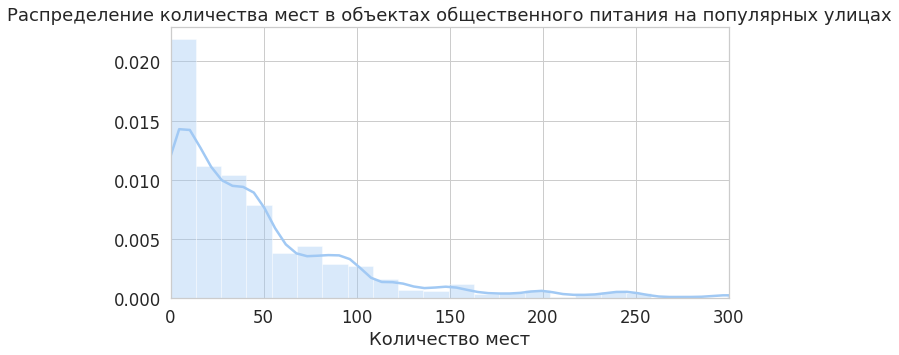

In [64]:
plt.figure(figsize=(10,5))
plt.title('Распределение количества мест в объектах общественного питания на популярных улицах')
sns.distplot(report['number'])
plt.xlabel('Количество мест')
plt.xlim(0, 300)
plt.show()

plt.close()

In [65]:
report['number'].describe()

count    5584.000000
mean       50.952901
std        63.940020
min         0.000000
25%        10.000000
50%        32.000000
75%        67.250000
max       680.000000
Name: number, dtype: float64

А теперь сравним с данными по количеству мест для всех улиц.

In [66]:
rest_data['number'].describe()

count    14894.000000
mean        59.020142
std         69.112749
min          0.000000
25%         13.000000
50%         40.000000
75%         80.000000
max        700.000000
Name: number, dtype: float64

Предположим, что среднее значение количества мест в выборках одинаково (H0). Альтернативная гипотеза (H1) – они различаются.

In [67]:
from scipy import stats as st


results = st.ttest_ind(report['number'], rest_data['number'], equal_var=True)

print('p-значение:', results.pvalue)

if results.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


p-значение: 3.3524220702085767e-14
Отвергаем нулевую гипотезу


Гипотеза Н0 несостоятельна.

По данному блоку заметим, что для популярных улиц характерно малое количество посадочных мест. Это может быть связано с тем, что на этих улицах стоимость квадратного метра площади стоит больше или с тем,что объем площадей ограничен.

### Выводы

Отметим, что было проделано в данной работе. В рамках выполнения исследования было:

- Изучено распределение по принадлежности к сети для объектов общественного питания;
- Изучено распределение типов объектов общественного питания, а также сделан разрез по принадлежности к сетевой модели;
- Изучены наиболее популярные улицы, а также наименее популярные улицы, на которых есть заведения объественного питания;
- Изучено распределение по количеству посадочных мест.


На основании полученных результатов укажем следующие выводы исследования:

- Наиболее популярными улицами для расположения своего заведения являются улицы, находящиеся ближе к ЦАО или к точкам интереса (таким, как торговые центры, бизнес-центры и так далее);
- Наименее популярные улицы располагаются не только в отдаленных районах города Москвы, но и в центре;
- Сетевая модель используется чаще всего для кафе, ресторанов и предприятий быстрого обслуживания. Это связано с тем, что остальные виды объектов общественного питания сложнее сделать сетевыми. 
- Количество посадочных мест мест в заведениях на популярных улицах редко достигает более 100 единиц. Но есть и заведения, для которых количество посадочных мест не имеет значения - нужно помнить об этом при принятии решения относительно типа объекта общественного питания.



В качестве **рекомендаций** по развитию бизнесса рекомендуется:

- В качестве местоположения выбрать одну из популярных улиц, расположенных близ центра Москвы или в точке привлечения граждан (это может быть место в ТЦ с высокой проходимостью). Для непопулярных улиц на окраине города эффект нового ресторана с таким ноу-хау будет незначительный - все местные жители раз-два поедят в таком месте и забудут про него, и дальнейшее развитие бизнеса окажется под угрозой.

- Количество посадочных мест должно быть не слишком большим - в пределах 30. Это позволит сэкономить на аренде. Ещё одним минусом большого количества посадочных мест можно назвать ситуации, когда человек заходит в ресторан, а он наполовину пустой. Невольно посетитель задастся вопросом "А почему так?".

- Тип заведения желательно выбрать либо кафе, либо ресторан; но нельзя создавать сеть из таких кафе. Сеть ресторанов чаще всего связана с ресторанами быстрого питания или кафе, а также с опытом франчайзинга. Если создаваемое заведение действительно хочет быть уникальным, то создание сети робо-кофеен или ресторанов может помешать корректному позиционированию на рынке.

## Презентация

Презентация доступна по ссылке на Google Drive:

https://drive.google.com/file/d/1ax0hiE7WRdLf1eOtHqifAeaADB11Rzxj/view?usp=sharing

